In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import sys
sys.path.append('..')

import os
import cv2
import numpy as np
import torch
from PIL import Image
from pytorch_lightning import seed_everything
from glob import glob
import matplotlib.pyplot as plt

from cldm.model import create_model, load_state_dict
from dataset import PhotoSketchDataset
from inference import run_sampler
from share import *

In [3]:
model = create_model('../models/cldm_v15.yaml').cpu()

No module 'xformers'. Proceeding without it.
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Loaded model config from [../models/cldm_v15.yaml]


In [4]:
model.load_state_dict(load_state_dict("/raid/lingo/alexisro/ControlNet/project/experiments/sketch_0503/lightning_logs/version_9/checkpoints/epoch=28-step=57999.ckpt", location='cuda'))
model = model.cuda()

Loaded state_dict from [/raid/lingo/alexisro/ControlNet/project/experiments/sketch_0503/lightning_logs/version_9/checkpoints/epoch=28-step=57999.ckpt]


In [52]:
frame_paths = sorted(glob("frames2/*.png"))
print(frame_paths)

sketches, outputs = [], []

for path in frame_paths:
    sketch = cv2.imread(path)
    prompt = "a woman playing with a dog"
    
    results = run_sampler(model, sketch, prompt, seed=40, image_resolution=512)
    sketches.append(sketch)
    outputs.append(results[0])

Global seed set to 40


['frames2/frame_000.png', 'frames2/frame_001.png', 'frames2/frame_002.png', 'frames2/frame_003.png', 'frames2/frame_004.png', 'frames2/frame_005.png', 'frames2/frame_006.png', 'frames2/frame_007.png', 'frames2/frame_008.png', 'frames2/frame_009.png', 'frames2/frame_010.png', 'frames2/frame_011.png', 'frames2/frame_012.png', 'frames2/frame_013.png']
Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
Global seed set to 40


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]


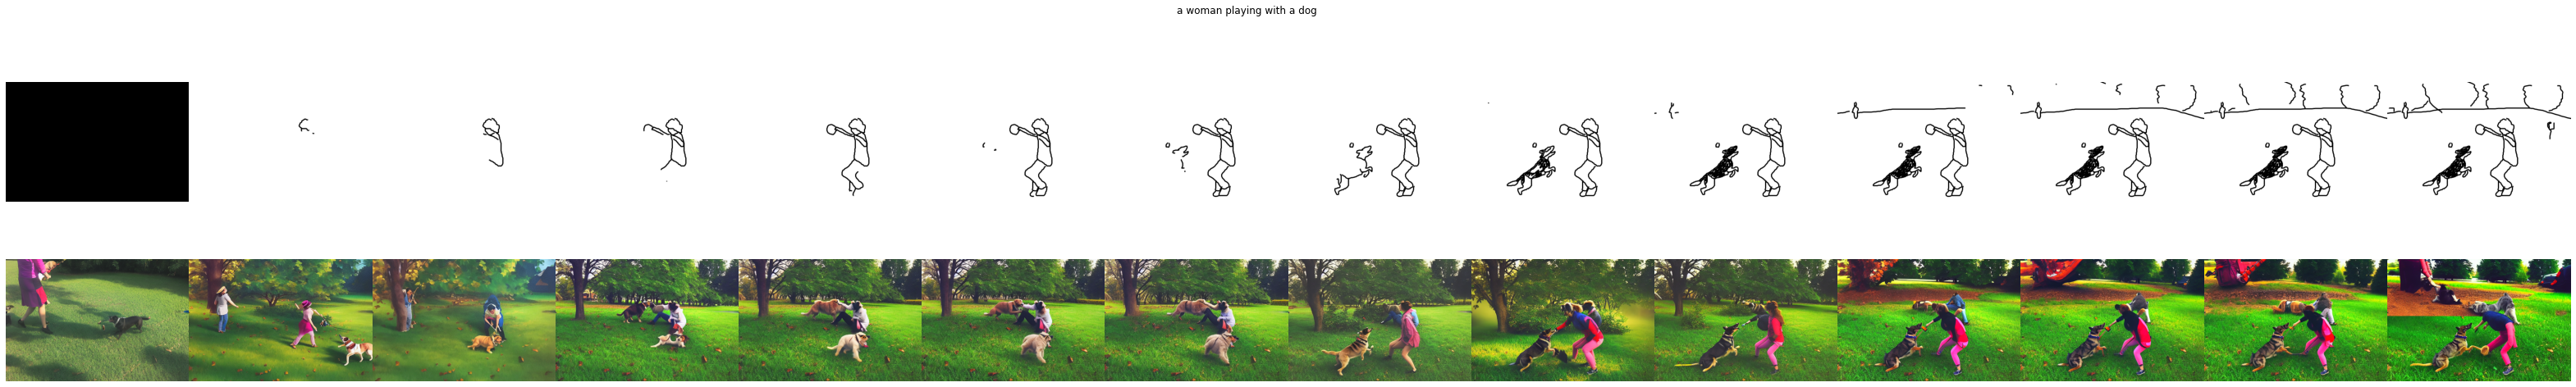

In [53]:
# Assuming you have two lists of image arrays called "sketches" and "outputs"
num_images = len(sketches)

# Calculate the number of rows needed to display the images in a grid
num_rows = 2

# Calculate the number of columns needed to display the images in a grid
num_cols = len(sketches)

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*4, num_rows*4), gridspec_kw={'wspace': 0., 'hspace': 0.})

# Loop through the sketch and output image arrays and display each one in a subplot
for i, (sketch, output) in enumerate(zip(sketches, outputs)):
    col = i

    axes[0, i].imshow(sketch)
    axes[1, i].imshow(output)

    axes[row, col].axis('off')
    axes[row + 1, col].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.suptitle(prompt)
plt.show()